# **Blood Cell Images Classification**


# Method 1: Using fast.ai (ResNet34)

## Loading libraries

In [3]:
import numpy as np 
import pandas as pd 
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *

In [4]:
path = Path('/kaggle/input/blood-cells/dataset2-master/dataset2-master/images')
path.ls()

[PosixPath('/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TEST_SIMPLE'),
 PosixPath('/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TEST'),
 PosixPath('/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN')]

In [5]:
(path/'TRAIN').ls()

[PosixPath('/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL'),
 PosixPath('/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE'),
 PosixPath('/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE'),
 PosixPath('/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL')]

## Image Data Visualization

In [6]:
data = ImageDataBunch.from_folder(path, train='TRAIN', test='TEST', valid_pct=0.20,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data

ImageDataBunch;

Train: LabelList (10012 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
EOSINOPHIL,EOSINOPHIL,EOSINOPHIL,EOSINOPHIL,EOSINOPHIL
Path: /kaggle/input/blood-cells/dataset2-master/dataset2-master/images;

Valid: LabelList (2503 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
EOSINOPHIL,NEUTROPHIL,LYMPHOCYTE,MONOCYTE,NEUTROPHIL
Path: /kaggle/input/blood-cells/dataset2-master/dataset2-master/images;

Test: LabelList (2487 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /kaggle/input/blood-cells/dataset2-master/dataset2-master/images

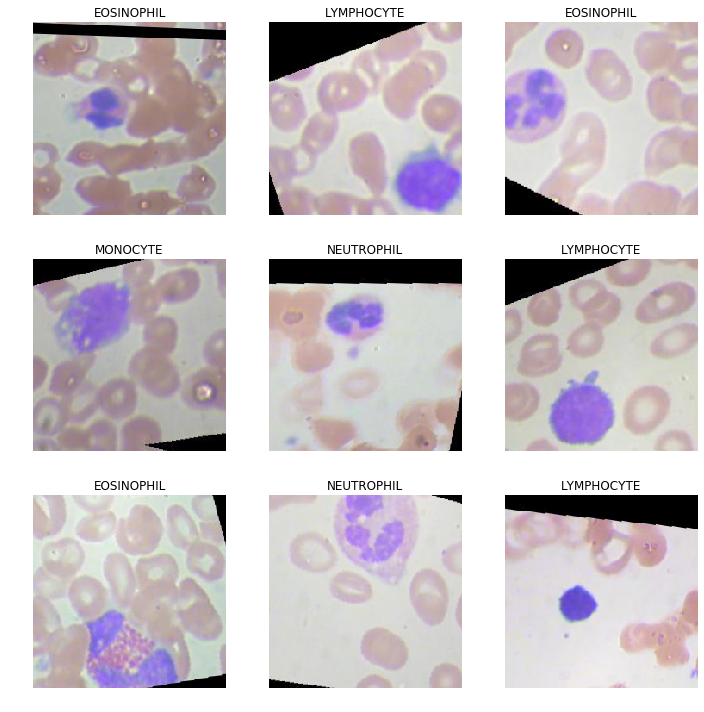

In [8]:
data.show_batch(rows=3, figsize=(10,10))

In [9]:
data.c, len(data.train_ds), len(data.valid_ds), len(data.classes), len(data.test_ds)

(4, 10012, 2503, 4, 2487)

## Building the Model

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:05<00:00, 15.2MB/s]


## Running with 4 Epochs

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.067695,0.462469,0.174590,01:53
1,0.464550,0.189330,0.072713,01:47
2,0.287183,0.119704,0.047543,01:47
3,0.219348,0.111005,0.037954,01:47


In [12]:
learn.model_dir=Path('/kaggle/working')
learn.save('stage-1')

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

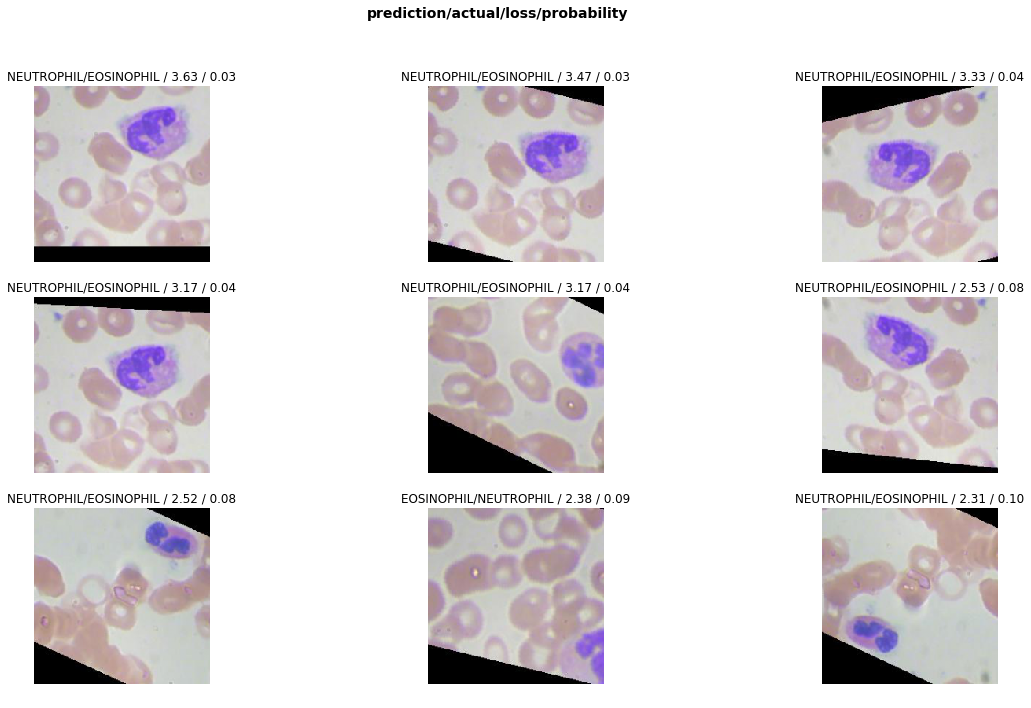

In [17]:
interp.plot_top_losses(9,figsize=(20,11))

## Confusion Matrix

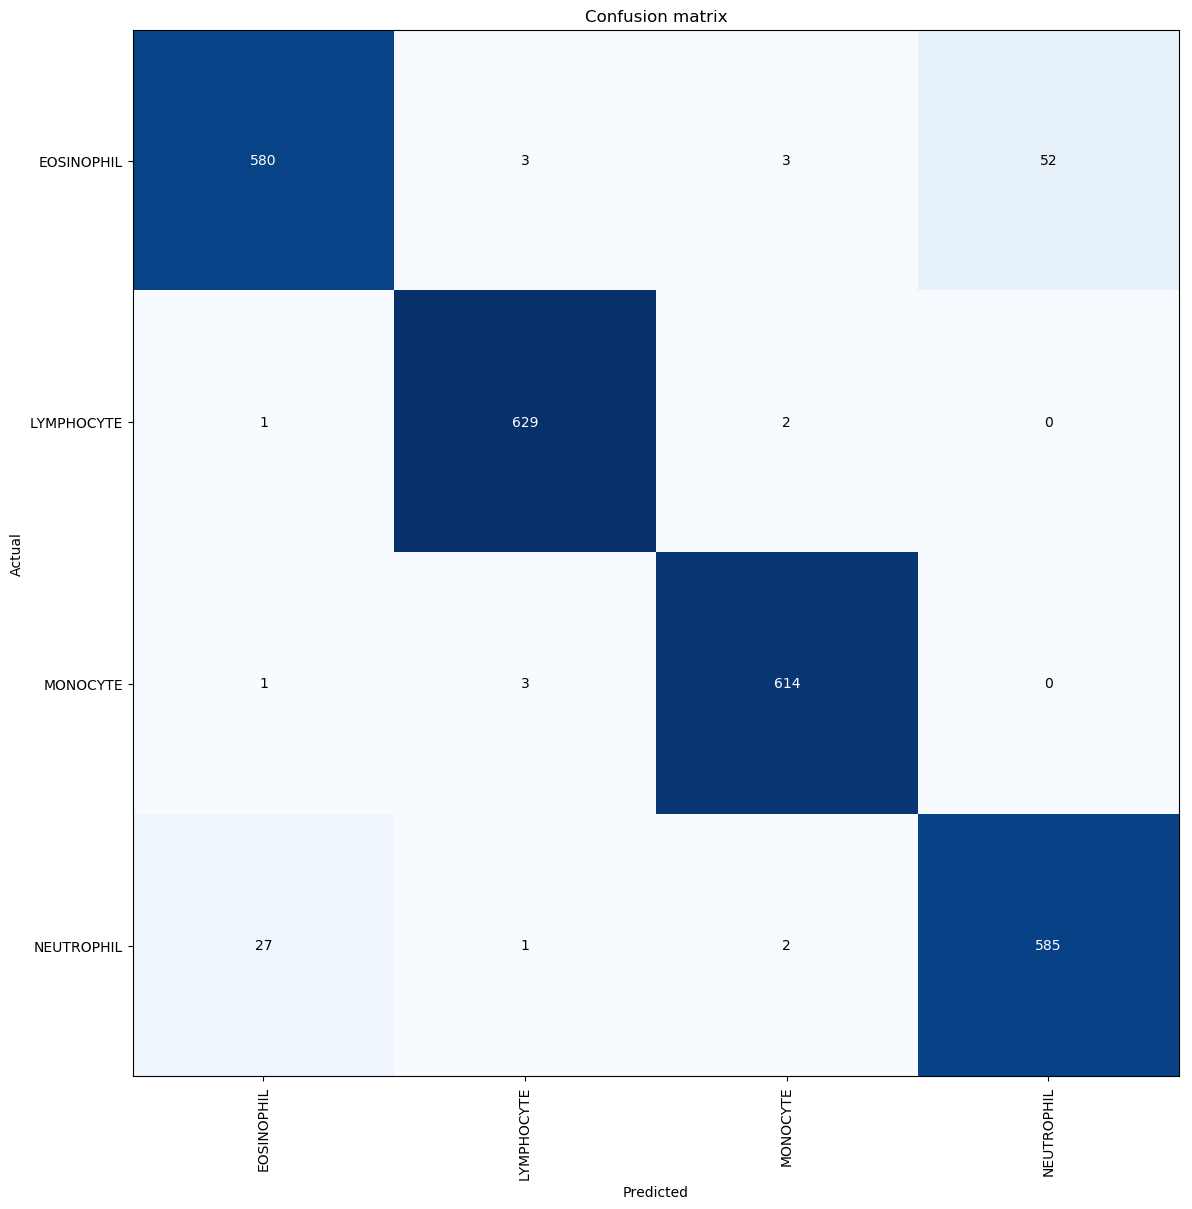

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=100)

## Seeing the number of images whose classes were incorrectly classified 

In [21]:
interp.most_confused(min_val = 2)

[('EOSINOPHIL', 'NEUTROPHIL', 52),
 ('NEUTROPHIL', 'EOSINOPHIL', 27),
 ('EOSINOPHIL', 'LYMPHOCYTE', 3),
 ('EOSINOPHIL', 'MONOCYTE', 3),
 ('MONOCYTE', 'LYMPHOCYTE', 3),
 ('LYMPHOCYTE', 'MONOCYTE', 2),
 ('NEUTROPHIL', 'MONOCYTE', 2)]

## Running with 10 Epochs

## Loading the previous trained model

In [28]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (10012 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
EOSINOPHIL,EOSINOPHIL,EOSINOPHIL,EOSINOPHIL,EOSINOPHIL
Path: /kaggle/input/blood-cells/dataset2-master/dataset2-master/images;

Valid: LabelList (2503 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
EOSINOPHIL,NEUTROPHIL,LYMPHOCYTE,MONOCYTE,NEUTROPHIL
Path: /kaggle/input/blood-cells/dataset2-master/dataset2-master/images;

Test: LabelList (2487 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /kaggle/input/blood-cells/dataset2-master/dataset2-master/images, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, m

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


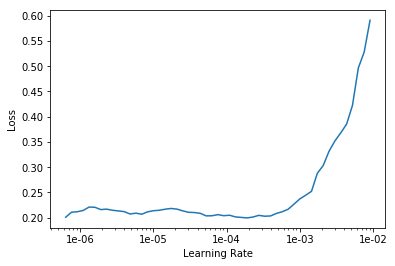

In [30]:
learn.recorder.plot()

In [31]:
learn.unfreeze()
learn.fit_one_cycle(11, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.199040,0.101139,0.033160,01:45
1,0.165351,0.077813,0.028366,01:46
2,0.126660,0.051211,0.017179,01:47
3,0.086135,0.029954,0.007591,01:49
4,0.062014,0.018582,0.003196,01:48
5,0.047061,0.012905,0.002397,01:48
6,0.041578,0.010072,0.003196,01:48
7,0.033122,0.007957,0.001199,01:57
8,0.034142,0.006620,0.000799,01:52
9,0.026762,0.006772,0.001199,01:50


In [32]:
learn.save('model_resnet34')

In [33]:
interp = ClassificationInterpretation.from_learner(learn)

## Confusion Matrix

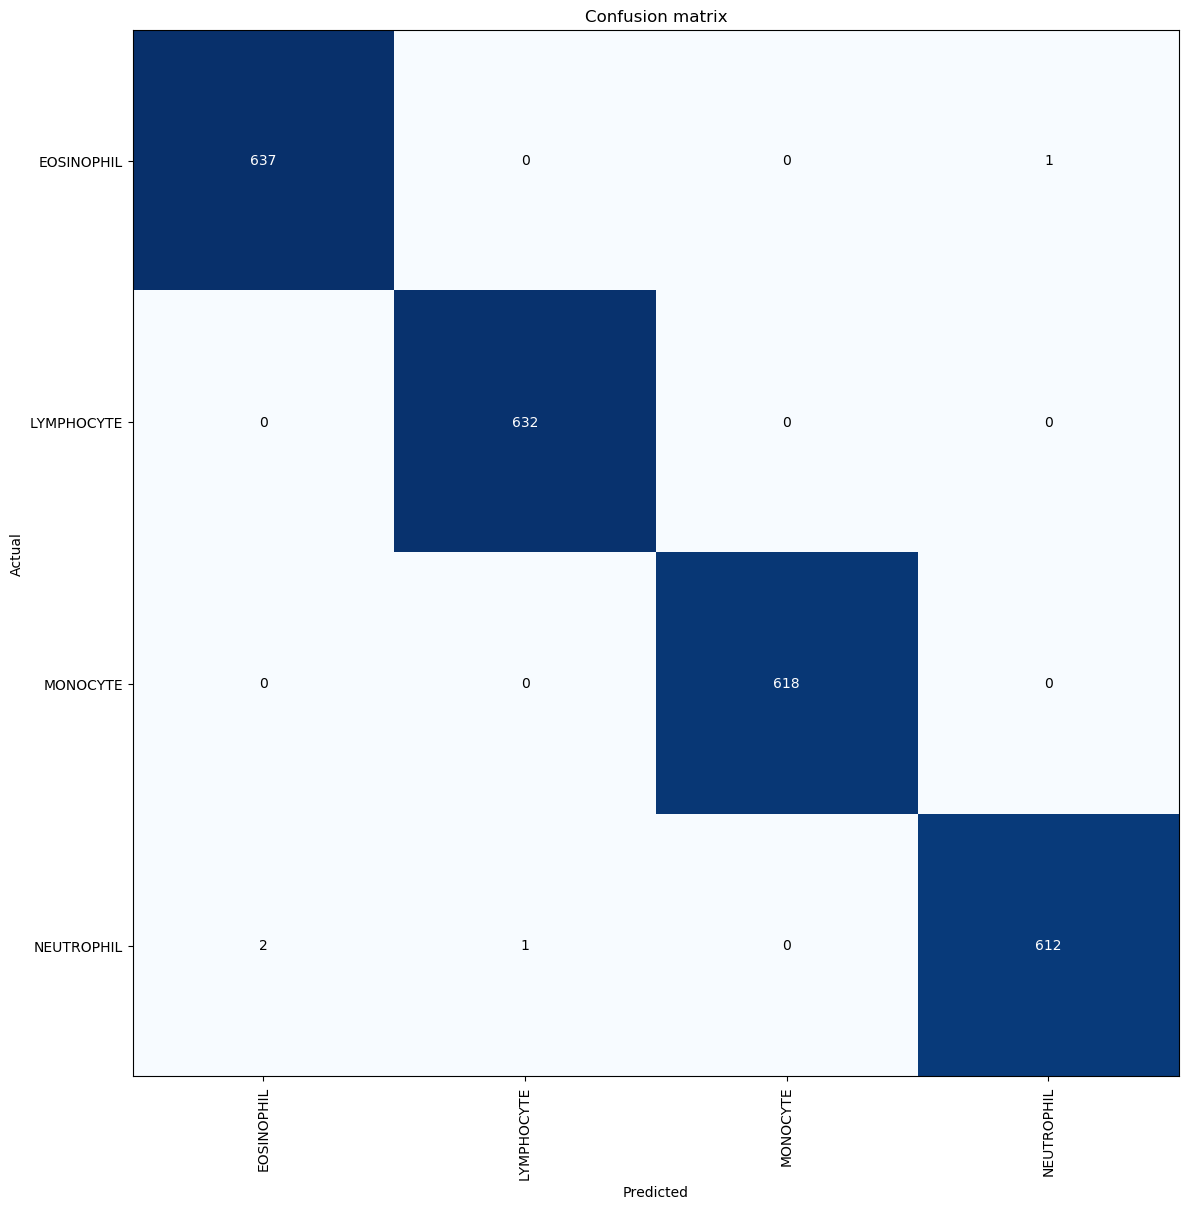

In [34]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=100)

## Seeing the number of images whose classes were incorrectly classified 

In [36]:
interp.most_confused()

[('NEUTROPHIL', 'EOSINOPHIL', 2),
 ('EOSINOPHIL', 'NEUTROPHIL', 1),
 ('NEUTROPHIL', 'LYMPHOCYTE', 1)]

# Method 2: Using Keras, Tensorflow

## Setting up Google Colab to receive data from Kaggle

In [3]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"dashyanngkachru","key":"a30637f9f4c492b5bfe349e3615cc312"}'}

In [2]:
!ls

kaggle.json  sample_data


In [3]:
!mkdir .kaggle

In [4]:
import json
token = {"username":"dashyanngkachru","key":"a30637f9f4c492b5bfe349e3615cc312"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [7]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [8]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [9]:
!chmod 600 /root/.kaggle/kaggle.json

## Downloading the dataset 

In [ ]:
!kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
vzrenggamani/hanacaraka                                     Aksara Jawa / Hanacaraka                           9MB  2020-07-10 15:09:31             29  
vishnuvarthanrao/windows-store                              Windows Store                                     93KB  2020-07-07 12:29:07            640  
mrgeislinger/bart-ridership                                 BART Ridership                                   325MB  2020-07-09 22:28:07            122  
rohanrao/chai-time-data-science                             Chai Time Data Science | CTDS.Show                 3MB  2020-07-23 17:23:46            535  
garystafford/environmental-sensor-data-132k                 Environmental Sensor T

In [ ]:
!kaggle datasets list -s Blood

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
paultimothymooney/blood-cells                                 Blood Cell Images                                   108MB  2018-04-21 21:06:13          15086  
mkachuee/BloodPressureDataset                                 Cuff-Less Blood Pressure Estimation                   5GB  2017-06-03 23:47:04           2789  
bonastreyair/predicting-blood-analysis                        Predicting Blood Analysis                             5KB  2018-02-17 10:41:29           1176  
kmader/malaria-bounding-boxes                                 Malaria Bounding Boxes                                4GB  2019-05-09 13:37:54           1658  
ronitf/heart-disease-uci                            

In [10]:
!kaggle datasets download -d paultimothymooney/blood-cells -p /content

 98% 106M/108M [00:02<00:00, 64.4MB/s] 
100% 108M/108M [00:02<00:00, 54.8MB/s]


In [11]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8167.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8283.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8324.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8379.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8577.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8587.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8655.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8701.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_872.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8864.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8931.jpeg  
  inflating: dataset2-mast

## Loading libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import sklearn.metrics as metrics
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from sklearn.metrics import roc_auc_score
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading the dataset

In [ ]:
df = pd.read_csv('dataset2-master/dataset2-master/labels.csv')
df.head()

,Unnamed: 0,Image,Category
0,NaN,0,NEUTROPHIL
1,NaN,1,NEUTROPHIL
2,NaN,2,NEUTROPHIL
3,NaN,3,NEUTROPHIL
4,NaN,4,NEUTROPHIL


## Exploratory Data Analysis

In [ ]:
df.shape

(411, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Image       411 non-null    int64  
 2   Category    367 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.8+ KB


In [ ]:
df['Category'].value_counts()

NEUTROPHIL                207
EOSINOPHIL                 88
LYMPHOCYTE                 33
MONOCYTE                   21
BASOPHIL                    3
NEUTROPHIL, NEUTROPHIL      3
NEUTROPHIL, EOSINOPHIL      2
MONOCYTE, LYMPHOCYTE        1
NEUTROPHIL,EOSINOPHIL       1
NEUTROPHIL, MONOCYTE        1
EOSINOPHIL, EOSINOPHIL      1
EOSINOPHIL,EOSINOPHIL       1
NEUTROPHIL, LYMPHOCYTE      1
NEUTROPHIL,BASOPHIL         1
NEUTROPHIL,NEUTROPHIL       1
LYMPHOCYTE, LYMPHOCYTE      1
EOSINOPHIL, LYMPHOCYTE      1
Name: Category, dtype: int64

In [ ]:
df.iloc[406, :]

Unnamed: 0    NaN
Image         406
Category      NaN
Name: 406, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

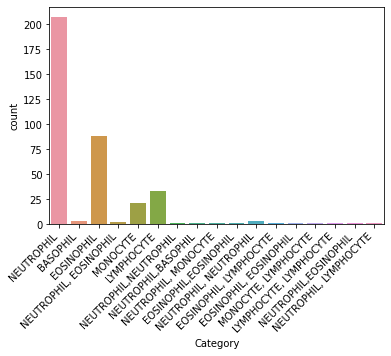

In [ ]:
sns.countplot(x='Category',data=df)
plt.xticks(rotation=45, horizontalalignment='right')

We see that we have the highest count for Neutrophil in this dataset, followed by Eosinophil, Lymphocyte, Monocyte. The rest categories have very less data

## Image Data Visualization

### Training Images

**EOSINOPHIL**

In [ ]:
img1 = cv2.imread('/content/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL/_0_207.jpeg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

In [ ]:
img1.shape

(240, 320, 3)

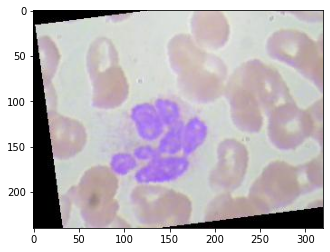

In [ ]:
plt.imshow(img1)

**LYMPHOCYTE**

In [ ]:
img2 = cv2.imread('/content/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_0_1063.jpeg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [ ]:
img2.shape

(240, 320, 3)

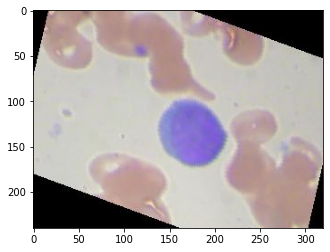

In [ ]:
plt.imshow(img2)

**MONOCYTE**

In [ ]:
img3 = cv2.imread('/content/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/_0_1173.jpeg')
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)

In [ ]:
img3.shape

(240, 320, 3)

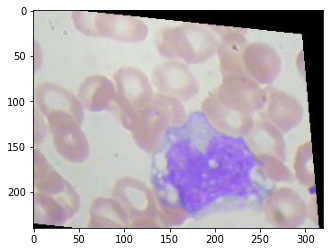

In [ ]:
plt.imshow(img3)

**NEUTROPHIL**

In [ ]:
img4 = cv2.imread('/content/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL/_0_1095.jpeg')
img4 = cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)

In [ ]:
img4.shape

(240, 320, 3)

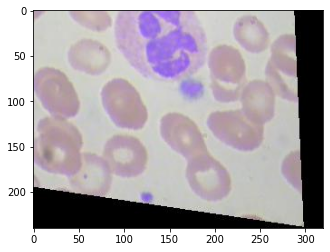

In [ ]:
plt.imshow(img4)

### Testing Images

**EOSINOPHIL**

In [ ]:
img5 = cv2.imread('/content/dataset2-master/dataset2-master/images/TEST/EOSINOPHIL/_0_1616.jpeg')
img5 = cv2.cvtColor(img5,cv2.COLOR_BGR2RGB)

In [ ]:
img5.shape

(240, 320, 3)

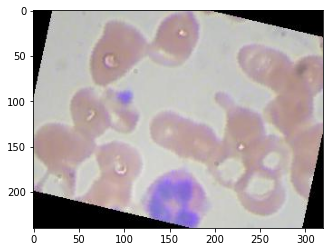

In [ ]:
plt.imshow(img5)

**LYMPHOCYTE**

In [ ]:
img6 = cv2.imread('/content/dataset2-master/dataset2-master/images/TEST/LYMPHOCYTE/_0_1022.jpeg')
img6 = cv2.cvtColor(img6,cv2.COLOR_BGR2RGB)

In [ ]:
img6.shape

(240, 320, 3)

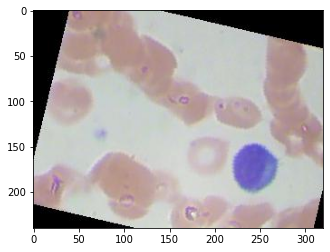

In [ ]:
plt.imshow(img6)

**MONOCYTE**

In [ ]:
img7 = cv2.imread('/content/dataset2-master/dataset2-master/images/TEST/MONOCYTE/_0_1123.jpeg')
img7 = cv2.cvtColor(img7,cv2.COLOR_BGR2RGB)

In [ ]:
img7.shape

(240, 320, 3)

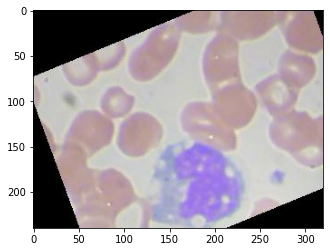

In [ ]:
plt.imshow(img7)

**NEUTROPHIL**


In [ ]:
img8 = cv2.imread('/content/dataset2-master/dataset2-master/images/TEST/NEUTROPHIL/_0_1469.jpeg')
img8 = cv2.cvtColor(img8,cv2.COLOR_BGR2RGB)

In [ ]:
img8.shape

(240, 320, 3)

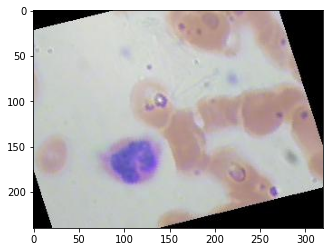

In [ ]:
plt.imshow(img8)

### Testing/Validation images (Images in Test_Simple folder)

**EOSINOPHIL**

In [ ]:
img9 = cv2.imread('/content/dataset2-master/dataset2-master/images/TEST_SIMPLE/EOSINOPHIL/_0_5239.jpeg')
img9 = cv2.cvtColor(img9,cv2.COLOR_BGR2RGB)

In [ ]:
img9.shape

(240, 320, 3)

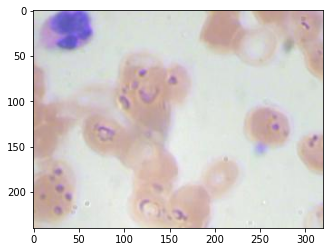

In [ ]:
plt.imshow(img9)

**LYMPHOCYTE**

In [ ]:
img10 = cv2.imread('/content/dataset2-master/dataset2-master/images/TEST_SIMPLE/LYMPHOCYTE/_0_3975.jpeg')
img10 = cv2.cvtColor(img10,cv2.COLOR_BGR2RGB)

In [ ]:
img10.shape

(240, 320, 3)

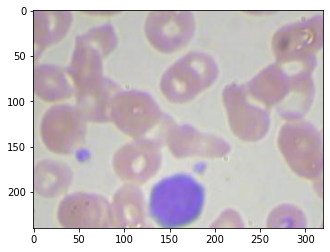

In [ ]:
plt.imshow(img10)

**MONOCYTE**

In [ ]:
img11 = cv2.imread('/content/dataset2-master/dataset2-master/images/TEST_SIMPLE/MONOCYTE/_0_5020.jpeg')
img11 = cv2.cvtColor(img11,cv2.COLOR_BGR2RGB)

In [ ]:
img11.shape

(240, 320, 3)

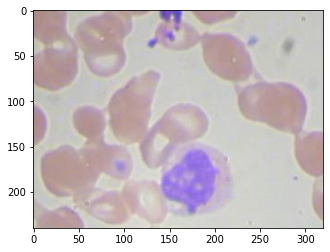

In [ ]:
plt.imshow(img11)

**NEUTROPHIL**

In [ ]:
img12 = cv2.imread('/content/dataset2-master/dataset2-master/images/TEST_SIMPLE/NEUTROPHIL/_0_1966.jpeg')
img12 = cv2.cvtColor(img12,cv2.COLOR_BGR2RGB)

In [ ]:
img12.shape

(240, 320, 3)

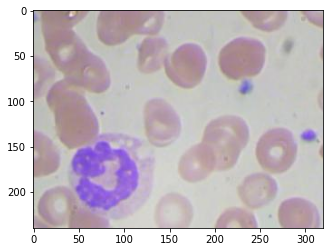

In [ ]:
plt.imshow(img12)

## Data Preparation

In [30]:
image_gen = ImageDataGenerator(rotation_range = 30, zoom_range = 0.20, 
                              fill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, 
                              width_shift_range = 0.1, height_shift_range = 0.1)

In [31]:
image_gen.flow_from_directory('/content/dataset2-master/dataset2-master/images/TRAIN')

Found 9957 images belonging to 4 classes.


In [32]:
image_gen.flow_from_directory('/content/dataset2-master/dataset2-master/images/TEST')

Found 2487 images belonging to 4 classes.


In [33]:
image_gen.flow_from_directory('/content/dataset2-master/dataset2-master/images/TEST_SIMPLE')

Found 71 images belonging to 4 classes.


## **Using flow from directory for getting the images**

In [ ]:
# width,height,channels
image_shape = (240, 320, 3)

In [ ]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory('/content/dataset2-master/dataset2-master/images/TRAIN',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode = "categorical")

Found 9957 images belonging to 4 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory('/content/dataset2-master/dataset2-master/images/TEST',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 2487 images belonging to 4 classes.


In [ ]:
validation_image_gen = image_gen.flow_from_directory('/content/dataset2-master/dataset2-master/images/TEST_SIMPLE',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 71 images belonging to 4 classes.


In [ ]:
train_image_gen.class_indices

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}

In [ ]:
test_image_gen.class_indices

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}

In [ ]:
validation_image_gen.class_indices

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}

## **Building the Model**

In [50]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(250))
model2.add(Activation('relu'))
model2.add(Dense(4))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

In [51]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)       

In [53]:
results = model2.fit_generator(train_image_gen,epochs=65,
                              steps_per_epoch=20,
                              validation_data=test_image_gen,
                              validation_steps=20)

Epoch 1/65
20/20 [==============================] - 37s 2s/step - loss: 0.9258 - accuracy: 0.5599 - val_loss: 0.9126 - val_accuracy: 0.5781
Epoch 2/65
20/20 [==============================] - 38s 2s/step - loss: 1.0473 - accuracy: 0.5219 - val_loss: 1.0638 - val_accuracy: 0.4594
Epoch 3/65
20/20 [==============================] - 38s 2s/step - loss: 0.9306 - accuracy: 0.5719 - val_loss: 0.9473 - val_accuracy: 0.5312
Epoch 4/65
20/20 [==============================] - 38s 2s/step - loss: 0.8919 - accuracy: 0.6344 - val_loss: 0.9441 - val_accuracy: 0.5531
Epoch 5/65
20/20 [==============================] - 38s 2s/step - loss: 0.9045 - accuracy: 0.5875 - val_loss: 0.8845 - val_accuracy: 0.5688
Epoch 6/65
20/20 [==============================] - 38s 2s/step - loss: 0.8765 - accuracy: 0.6187 - val_loss: 1.0366 - val_accuracy: 0.5063
Epoch 7/65
20/20 [==============================] - 38s 2s/step - loss: 0.8799 - accuracy: 0.5844 - val_loss: 0.9849 - val_accuracy: 0.5219
Epoch 8/65
20/20 [==

## **Predicting on Test Data**

In [54]:
prediction = model2.predict_generator(test_image_gen, verbose=1)
prediction

Instructions for updating:
Please use Model.predict, which supports generators.
156/156 [==============================] - 84s 537ms/step


array([[0.03506099, 0.14539233, 0.36058044, 0.45896626],
       [0.21286775, 0.1027544 , 0.33745405, 0.3469238 ],
       [0.28388637, 0.03483016, 0.5248776 , 0.15640584],
       ...,
       [0.07819125, 0.76278824, 0.09458794, 0.06443259],
       [0.6918005 , 0.00371644, 0.07320142, 0.23128167],
       [0.48411363, 0.11072225, 0.17938147, 0.22578266]], dtype=float32)

In [74]:
predicted_class_indices = np.argmax(prediction,axis=1)
predicted_class_indices

array([3, 3, 2, ..., 1, 0, 0])

In [75]:
labels = (test_image_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
class_predictions = [labels[k] for k in predicted_class_indices]
class_predictions

['NEUTROPHIL',
 'NEUTROPHIL',
 'MONOCYTE',
 'MONOCYTE',
 'LYMPHOCYTE',
 'LYMPHOCYTE',
 'LYMPHOCYTE',
 'NEUTROPHIL',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'LYMPHOCYTE',
 'MONOCYTE',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'LYMPHOCYTE',
 'EOSINOPHIL',
 'LYMPHOCYTE',
 'MONOCYTE',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'MONOCYTE',
 'LYMPHOCYTE',
 'EOSINOPHIL',
 'MONOCYTE',
 'MONOCYTE',
 'MONOCYTE',
 'LYMPHOCYTE',
 'NEUTROPHIL',
 'LYMPHOCYTE',
 'EOSINOPHIL',
 'LYMPHOCYTE',
 'MONOCYTE',
 'NEUTROPHIL',
 'LYMPHOCYTE',
 'MONOCYTE',
 'MONOCYTE',
 'MONOCYTE',
 'EOSINOPHIL',
 'LYMPHOCYTE',
 'LYMPHOCYTE',
 'MONOCYTE',
 'MONOCYTE',
 'LYMPHOCYTE',
 'LYMPHOCYTE',
 'LYMPHOCYTE',
 'MONOCYTE',
 'LYMPHOCYTE',
 'LYMPHOCYTE',
 'NEUTROPHIL',
 'MONOCYTE',
 'EOSINOPHIL',
 'MONOCYTE',
 'EOSINOPHIL',
 'LYMPHOCYTE',
 'MONOCYTE',
 'NEUTROPHIL',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'LYMPHOCYTE',
 'EOSINOPHIL',
 'MONOCYTE',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'MONOCYTE',
 'MONOCYTE',
 'NEUTR

In [59]:
filenames = test_image_gen.filenames
results_df = pd.DataFrame({"Filename":filenames,
                      "Predictions":class_predictions})
results_df

,Filename,Predictions
0,EOSINOPHIL/_0_1616.jpeg,NEUTROPHIL
1,EOSINOPHIL/_0_1794.jpeg,NEUTROPHIL
2,EOSINOPHIL/_0_1845.jpeg,MONOCYTE
3,EOSINOPHIL/_0_187.jpeg,MONOCYTE
4,EOSINOPHIL/_0_196.jpeg,LYMPHOCYTE
...,...,...
2482,NEUTROPHIL/_9_5880.jpeg,NEUTROPHIL
2483,NEUTROPHIL/_9_6750.jpeg,EOSINOPHIL
2484,NEUTROPHIL/_9_6796.jpeg,LYMPHOCYTE
2485,NEUTROPHIL/_9_9821.jpeg,EOSINOPHIL


In [76]:
true_classes = test_image_gen.classes
class_labels = list(test_image_gen.class_indices.keys())  

## **Classification Report**

In [78]:
report = metrics.classification_report(true_classes, predicted_class_indices, target_names=class_labels)
print(report) 

              precision    recall  f1-score   support

  EOSINOPHIL       0.26      0.25      0.26       623
  LYMPHOCYTE       0.26      0.27      0.26       620
    MONOCYTE       0.26      0.31      0.28       620
  NEUTROPHIL       0.25      0.20      0.23       624

    accuracy                           0.26      2487
   macro avg       0.26      0.26      0.26      2487
weighted avg       0.26      0.26      0.26      2487



## **Confusion Matrix**

In [79]:
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_class_indices)
confusion_matrix

array([[157, 173, 169, 124],
       [134, 167, 191, 128],
       [147, 157, 193, 123],
       [158, 156, 183, 127]])

# Transfer Learning: Using VGG16

## Loading libraries

In [5]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.vgg16 import VGG16
from keras.layers.convolutional import *
import keras.applications as A
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam

## **Using flow from directory for getting the images**

In [ ]:
train_datagen2 = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest', validation_split=0.2)

validation_datagen2 = ImageDataGenerator(rescale=1./255)

train_batchsize2 = 260
val_batchsize2 = 100

In [ ]:
train_generator2 = train_datagen2.flow_from_directory(
        '/content/dataset2-master/dataset2-master/images/TRAIN',
        target_size=(224,224),
        batch_size=train_batchsize2,
        class_mode='categorical', subset = "training")
 
val_generator2 = train_datagen2.flow_from_directory(
        '/content/dataset2-master/dataset2-master/images/TRAIN',
        target_size=(224,224),
        batch_size=val_batchsize2,
        class_mode='categorical',
        shuffle=False,
    subset='validation')

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.


## **Building the Model**

In [ ]:
vgg_model = VGG16(weights='imagenet',include_top=False, input_shape=(224,224,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
CLASSES = 4
    
for layer in vgg_model.layers[:-4]:
    layer.trainable = False

model4 = Sequential()
model4.add(vgg_model)

# Add new layers
model4.add(Flatten())
model4.add(BatchNormalization())
model4.add(Dense(64, activation='relu' ))
model4.add(Dropout(0.2))
model4.add(BatchNormalization())
model4.add(Dense(16, activation='relu' ))
model4.add(Dropout(0.2))
model4.add(BatchNormalization())
model4.add(Dense(8, activation='relu' ))
model4.add(BatchNormalization())
model4.add(Dense(4, activation='softmax'))
        
model4.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 25088)             100352    
_________________________________________________________________
dense (Dense)                (None, 64)                1605696   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 16)               

In [ ]:
history2 = model4.fit_generator(
      train_generator2,
      steps_per_epoch=train_generator2.samples//260 ,
      epochs=2,
      validation_data=val_generator2,
      validation_steps=val_generator2.samples//100,
      verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
30/30 [==============================] - 5218s 174s/step - loss: 1.5930 - accuracy: 0.3630 - val_loss: 1.3059 - val_accuracy: 0.4168
Epoch 2/2
30/30 [==============================] - 5278s 176s/step - loss: 1.1131 - accuracy: 0.5327 - val_loss: 1.2185 - val_accuracy: 0.4589


In [ ]:
print("The best Training accuracy {}".format(max(acc)*100))
print("The best validation accuracy {} ".format(max(val_acc)*100))

The best Training accuracy 53.26933264732361
The best validation accuracy 45.89473605155945 


## **Predicting on Test Data**

In [ ]:
test_datagen2 = ImageDataGenerator(rescale=1./255 )

In [ ]:
test_generator2 = test_datagen2.flow_from_directory(
        '/content/dataset2-master/dataset2-master/images/TEST',
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
)

Found 2487 images belonging to 4 classes.


In [ ]:
pred2 = model4.predict_generator(test_generator2,verbose=1)
pred2

78/78 [==============================] - 1195s 15s/step


array([[0.30083698, 0.1599586 , 0.3328259 , 0.20637849],
       [0.31385002, 0.1949624 , 0.31918514, 0.17200245],
       [0.30262712, 0.16295856, 0.33853433, 0.19587997],
       ...,
       [0.25522342, 0.1729289 , 0.3522298 , 0.21961784],
       [0.20958096, 0.17156741, 0.39602864, 0.22282302],
       [0.1090253 , 0.24821216, 0.24918379, 0.39357874]], dtype=float32)

In [ ]:
len(pred2)

2487

In [ ]:
predicted_class_indices2 = np.argmax(pred2,axis=1)
predicted_class_indices2

array([2, 2, 2, ..., 2, 2, 3])

In [ ]:
labels2 = (train_generator2.class_indices)
labels2 = dict((v,k) for k,v in labels2.items())
predictions2 = [labels[k] for k in predicted_class_indices2]
predictions2

['MONOCYTE',
 'MONOCYTE',
 'MONOCYTE',
 'EOSINOPHIL',
 'MONOCYTE',
 'LYMPHOCYTE',
 'MONOCYTE',
 'MONOCYTE',
 'LYMPHOCYTE',
 'MONOCYTE',
 'MONOCYTE',
 'EOSINOPHIL',
 'MONOCYTE',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'MONOCYTE',
 'EOSINOPHIL',
 'MONOCYTE',
 'EOSINOPHIL',
 'MONOCYTE',
 'MONOCYTE',
 'MONOCYTE',
 'MONOCYTE',
 'MONOCYTE',
 'MONOCYTE',
 'MONOCYTE',
 'EOSINOPHIL',
 'MONOCYTE',
 'MONOCYTE',
 'MONOCYTE',
 'MONOCYTE',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'MONOCYTE',
 'EOSINOPHIL',
 'MONOCYTE',
 'EOSINOPHIL',
 'MONOCYTE',
 'MONOCYTE',
 'EOSINOPHIL',
 'MONOCYTE',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'LYMPHOCYTE',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'MONOCYTE',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'MONOCYTE',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'MONOCYTE',
 'MONOCYTE',
 'MONOCYTE',
 'EOSINOPHIL',
 'MONOCYTE',
 'EOSINOPHIL',
 'LYMPHOCYTE',
 'EOSINOPHIL',
 'EOSINOPHIL',
 'MONOCYTE',
 'MONOCYTE',
 'MONOCYTE',
 'MONOCYTE',
 'EOSINOPHIL',
 'MONOCYTE',
 'MONOCYTE'

In [ ]:
filenames2 = test_generator2.filenames
results2 = pd.DataFrame({"Filename":filenames2,
                      "Predictions":predictions2})
results2

,Filename,Predictions
0,EOSINOPHIL/_0_1616.jpeg,MONOCYTE
1,EOSINOPHIL/_0_1794.jpeg,MONOCYTE
2,EOSINOPHIL/_0_1845.jpeg,MONOCYTE
3,EOSINOPHIL/_0_187.jpeg,EOSINOPHIL
4,EOSINOPHIL/_0_196.jpeg,MONOCYTE
...,...,...
2482,NEUTROPHIL/_9_5880.jpeg,MONOCYTE
2483,NEUTROPHIL/_9_6750.jpeg,MONOCYTE
2484,NEUTROPHIL/_9_6796.jpeg,MONOCYTE
2485,NEUTROPHIL/_9_9821.jpeg,MONOCYTE


In [ ]:
true_classes = test_generator2.classes
class_labels = list(test_generator2.class_indices.keys())   

## **Classification Report**

In [ ]:
report = metrics.classification_report(true_classes, predicted_class_indices2, target_names=class_labels)
print(report) 

              precision    recall  f1-score   support

  EOSINOPHIL       0.39      0.44      0.42       623
  LYMPHOCYTE       0.94      0.40      0.56       620
    MONOCYTE       0.37      0.86      0.51       620
  NEUTROPHIL       0.91      0.11      0.20       624

    accuracy                           0.45      2487
   macro avg       0.65      0.45      0.42      2487
weighted avg       0.65      0.45      0.42      2487



## **Confusion Matrix**

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_class_indices2)
confusion_matrix

array([[275,  11, 333,   4],
       [269, 248, 100,   3],
       [ 89,   0, 531,   0],
       [ 64,   6, 485,  69]])

# After comparing all the models by looking at the confusion matrix, we see the best model to predict on test data is using ResNet34 with 10 epochs as only 4 images are misclassified using that model

## Note: For the models used with keras, even though epoch was increased for them, we did not see as good a confusion matrix as the one we got with ResNet34